In [2]:
import os
import gdown
from src import config

"""
Download from the needed datasets for the project.
"""

if not os.path.exists(config.DATASET_TRAIN):
    gdown.download(config.DATASET_TRAIN_URL, config.DATASET_TRAIN, quiet=False)


In [3]:
import pyarrow.parquet as pq
from sklearn import datasets
trips = pq.read_table(config.DATASET_TRAIN)
trips = trips.to_pandas()

In [10]:
print(trips.describe())

           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime   
count  3.588295e+06                     3588295                     3588295  \
mean   1.713103e+00  2022-05-16 07:50:29.219312  2022-05-16 08:08:42.275203   
min    1.000000e+00         2003-01-01 00:06:06         2003-01-01 00:31:38   
25%    1.000000e+00  2022-05-08 18:14:16.500000         2022-05-08 18:32:36   
50%    2.000000e+00         2022-05-16 09:14:42         2022-05-16 09:33:15   
75%    2.000000e+00         2022-05-23 18:03:17  2022-05-23 18:21:03.500000   
max    6.000000e+00         2022-06-01 23:55:30         2022-06-02 00:03:51   
std    4.888093e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID   
count     3.458771e+06   3.588295e+06  3.458771e+06  3.588295e+06  \
mean      1.393923e+00   6.856861e+00  1.365674e+00  1.645738e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.

In [11]:
print(trips.dtypes)

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object


In [ ]:
print(trips.shape)


In [ ]:
print(trips.head(5))

In [8]:
import matplotlib.pyplot as plt

def plot_values(data,title, xlabel, ylabel):
  value_counts = data.value_counts()
  value_counts.plot(kind='bar')

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

VendorID
2    2527997
1    1054130
6       6154
5         14
Name: count, dtype: int64


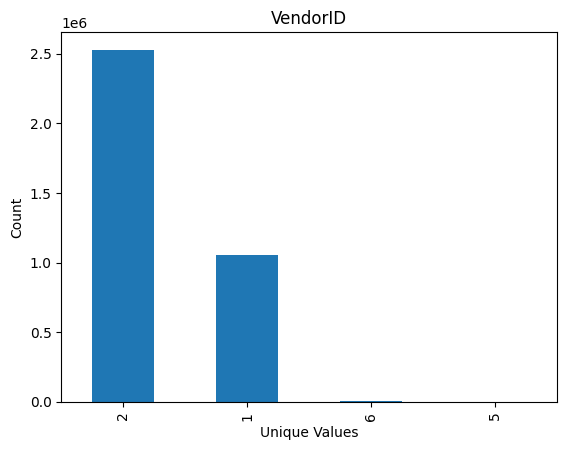

In [9]:
# Count the occurrences of each unique value in the column
value_counts = trips['VendorID'].value_counts()
print(value_counts)

plot_values(trips['VendorID'], 'VendorID', 'Unique Values', 'Count')
